# Changing Log Level in Jupyter Notebooks and Terminal Sessions

***

This tutorial covers:

- What log levels are
- Environment variables to set for changing log levels in Airflow
- Restarting the kernel
- Environment variables for other modules
- Setting the log level for `recipe run` execution

***

The log levels are a sequence of values that tell the program how much detail should be written to the log.  When the programmer writes code they may want to have detailed data in the log.  When the user runs the same code the details are not helpful and get in the way of seeing the overall picture of execution or mask error messages by hiding them within other messages.  The error levels, from least detail to most are CRITICAL, ERROR, WARNING, INFO, DEBUG, and NOTSET.  Each level logs messages at its level and higher levels.  Thus CRITICAL will log only CRITICAL errors, ERROR will log CRITICAL and ERROR level messages, etc.

The various DSS Python modules each have an environment variable that controls their log levels. These levels default to `INFO` in Airflow and to `WARN` in Jupyter. In order to change these levels in Jupyter notebooks, consider the following code:

In [1]:
# We see that the default log level for the dss_airflow_utils module is 'WARN"
import os
os.environ.get("DSS_AIRFLOW_UTILS_LOG_LEVEL")

'WARN'

In [2]:
# At the warn log level, there will be no output 
# from the ConfigUtils#merge_configs method
from dss_airflow_utils.models import ConfigUtils
ConfigUtils.merge_configs({}, {})

[2019-02-21 19:55:00,995] {settings.py:174} INFO - setting.configure_orm(): Using pool settings. pool_size=5, pool_recycle=1800


{}

To set the log level to 'INFO', restart the kernel
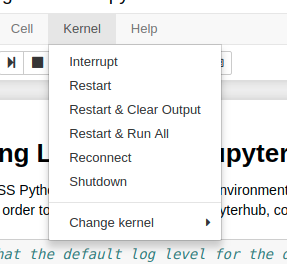

In [1]:
# And then set the log level to 'INFO'
import os
os.environ["DSS_AIRFLOW_UTILS_LOG_LEVEL"]="INFO"
os.environ.get("DSS_AIRFLOW_UTILS_LOG_LEVEL")

'INFO'

In [2]:
# Notice that we now have 'INFO' level logs
from dss_airflow_utils.models import ConfigUtils
ConfigUtils.merge_configs({}, {})

[2019-02-21 19:55:33,123] {settings.py:174} INFO - setting.configure_orm(): Using pool settings. pool_size=5, pool_recycle=1800
[2019-02-21 19:55:34,865] {models.py:33} INFO - Config1 is: {}
[2019-02-21 19:55:34,867] {models.py:34} INFO - Config2 is: {}
[2019-02-21 19:55:34,868] {models.py:45} INFO - Output config is: {}


{}

The environment variables for the various modules are as follows:
- dss_airflow_utils - DSS_AIRFLOW_UTILS_LOG_LEVEL
- dss_utils - DSS_UTILS_LOG_LEVEL
- dss_datacache_client - DSS_DATACACHE_CLIENT_LOG_LEVEL
- dss_recipe_client - DSS_RECIPE_CLIENT_LOG_LEVEL

All of the environment variables can be modified the same way as above. Please note that you just have to change the log level of the module before your first import of said module.

## Jupyterhub Terminal
Take `recipe run job_request.yaml`. For this terminal command, you will see any recipe CLI logs above 'INFO'. If you'd like to see less output in the logs change to the 'WARN' level logs by rewriting this command as

`DSS_RECIPE_CLIENT_LOG_LEVEL=WARN recipe run job_request.yaml`

Additional module environment variables can be added as demonstrated below (though the above will probably be all that is relevant for the recipe CLI):

`DSS_RECIPE_CLIENT_LOG_LEVEL=WARN DSS_DATACACHE_CLIENT_LOG_LEVEL=WARN recipe run job_request.yaml`

For example:

In [3]:
! recipe search

2019-02-21 20:00:09,425 - INFO - Attempting to search the recipes with id or description matching .* in the recipe repository.
2019-02-21 20:00:09,425 - INFO - Returning only the highest version string.
2019-02-21 20:00:09,425 - INFO - Returning case insensitive matches.
2019-02-21 20:00:09,425 - INFO - 
2019-02-21 20:00:09,426 - INFO - Searching for '.*'
2019-02-21 20:00:10,907 - INFO - Found 4 recipes matching '.*' in the recipe repository.

     Recipe ID                      Highest Version
     _________                      _______________

     Recipe ID: e2e_spark_recipe               0_0_1
     Description: This recipe is meant to be used in the system's end to end
             testing. It spins a spark cluster, performs a no-op task, and
                  then spins it down

     Recipe ID: simple-recipe                  0_3_3
     Description: A simple recipe

     Recipe ID: skeleton                       0_0_3
     Description: This optional field should be used to describ

In [4]:
! DSS_RECIPE_CLIENT_LOG_LEVEL=WARN recipe search


     Recipe ID                      Highest Version
     _________                      _______________

     Recipe ID: e2e_spark_recipe               0_0_1
     Description: This recipe is meant to be used in the system's end to end
             testing. It spins a spark cluster, performs a no-op task, and
                  then spins it down

     Recipe ID: simple-recipe                  0_3_3
     Description: A simple recipe

     Recipe ID: skeleton                       0_0_3
     Description: This optional field should be used to describe on a high level
             what the recipe is about in plain English.
                  E.g., This recipe is a skeleton example to be used as starting
             point to write new recipes.

     Recipe ID: wrong_email_test               0_0_6
     Description: This recipe is about testing the email notification system
             when a wrong email address is set



****

In the next tutorial we look at [Debugging Recipes](./debugging-recipes.ipynb)